# Семинар 3: Линейная регрессия, sklearn, регуляризация.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

def plot(x, y_true, y_pred=None):
    plt.scatter(x, y_true, label='true', color='blue')
    if y_pred is not None:
        plt.plot(x, y_pred, label='pred', color='red')
    plt.legend()

## Линейная регрессия, точное решение



Дано:

матрица объекты-признаки $X$

целевая переменная $y$

Строим модели вида:

$\hat{y} = Xw + \varepsilon$

где $w$ - вектор весов признаков, $\varepsilon$ - случайная компонента (данные неидеальны, поэтому без случайной компоненты не обойтись)

Оценка качества - MSE (среднеквадратическая ошибка): $$MSE(y, \hat{y}) = \frac{1}{l}\sum_{i=1}^l (y_i - \hat{y}_i)^2$$

Чем меньше MSE, тем лучше модель.


Как найти наилучший $w$?

Идея: найти $w$, при котором достигается минимум MSE

$$\hat{w} = (X^T X)^{-1}X^T y$$

Преимущества:


*   Готовая формула
*   Теоретическое обоснование

Надостатки:


*   Сложность обращения матрицы
*   Проблемы с $X^T X$ - может быть вырожденной или плохо обусловленной





### Сгенерируем точки для задачи регрессии

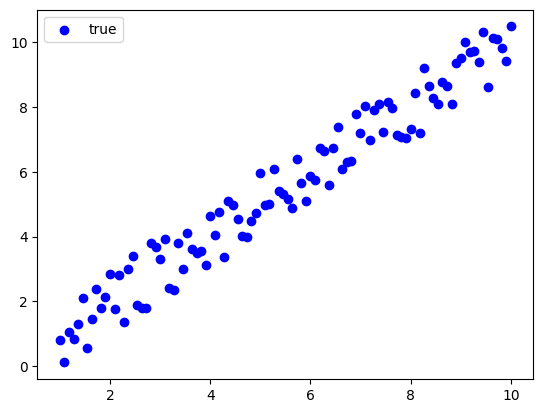

In [2]:
num_points = 100
m, b, delta = 1, 0, 1

x = np.linspace(1, 10, num_points)
y = m * x + b + np.random.uniform(-delta, delta, num_points)

plot(x, y)

In [3]:
x.shape

(100,)

In [4]:
x.reshape((-1, 1)).shape

(100, 1)

In [5]:
def linear_regression(x, y):
  x = x.reshape((-1, 1))
  w = np.linalg.inv(x.T @ x) @ x.T @ y
  return w

### Обучим нашу линейную регрессию и посмотрим на результат

In [6]:
w = linear_regression(x, y)

In [7]:
w.shape

(1,)

In [8]:
w

array([1.00592669])

MSE: 0.3593499339931363


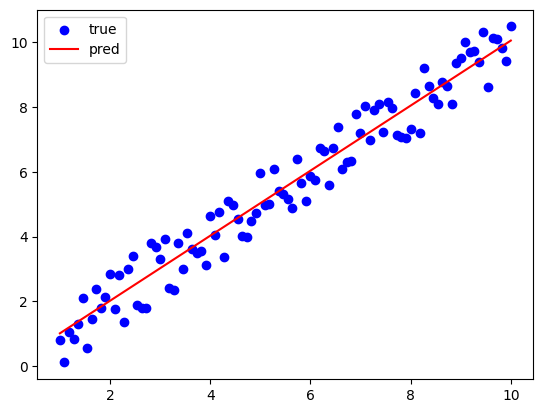

In [9]:
w = linear_regression(x, y)

y_pred = w * x
plot(x, y, y_pred)

print(f'MSE: {np.mean((y - y_pred)**2)}')

### Загрузим данные

```python
    def some_noisy_function(x, noise):
      num_points = x.shape[0]
      return .2 * x + 1.3 * np.sin(x) - .06 * x ** 2 + noise * np.random
      
    uniform(-noise, noise, num_points)
```


In [10]:
import pickle
!wget https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/data/sem03-data.pkl

x, y = pickle.load(open('sem03-data.pkl', 'rb'))

--2026-02-03 19:42:38--  https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/data/sem03-data.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1785 (1.7K) [application/octet-stream]
Saving to: ‘sem03-data.pkl’

sem03-data.pkl      100%[===================>]   1.74K  --.-KB/s    in 0s      

2026-02-03 19:42:38 (24.1 MB/s) - ‘sem03-data.pkl’ saved [1785/1785]



In [11]:
# Либо так:
# Только тут файл имеет другое название.

#!wget https://raw.githubusercontent.com/SergeyKorpachev/math-faculty-ml/main/2026/seminars/seminar03/data.pkl

In [12]:
x.shape

(100,)

### Обучим модель

MSE: 2.952085293253289


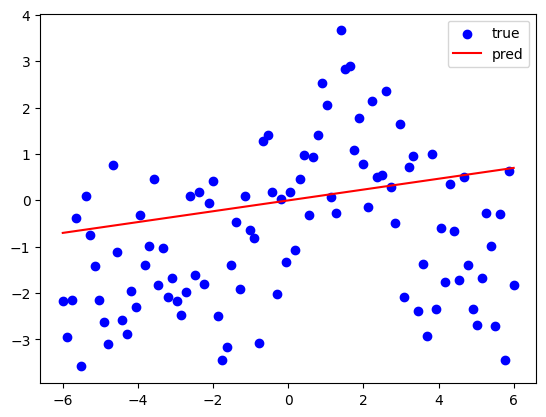

In [13]:
w = linear_regression(x, y)

y_pred = w * x

plot(x, y, y_pred)
print(f'MSE: {np.mean((y - y_pred) ** 2)}')

## Scikit-learn

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

MSE: 2.46713193783275


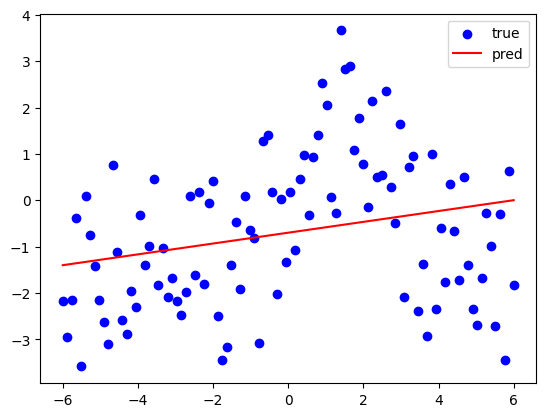

In [15]:
features = x.reshape(-1, 1)

lr.fit(features, y)
y_pred = lr.predict(features)

plot(x, y, y_pred)
print(f'MSE: {mean_squared_error(y, y_pred)}')

### Как улучшить?

**Подсказка:** вместо $x$ использовать какую-то функцию $f(x)$


In [16]:
np.concatenate([x.reshape((-1, 1)), x.reshape((-1, 1))**2], axis=1)

array([[-6.00000000e+00,  3.60000000e+01],
       [-5.87878788e+00,  3.45601469e+01],
       [-5.75757576e+00,  3.31496786e+01],
       [-5.63636364e+00,  3.17685950e+01],
       [-5.51515152e+00,  3.04168962e+01],
       [-5.39393939e+00,  2.90945822e+01],
       [-5.27272727e+00,  2.78016529e+01],
       [-5.15151515e+00,  2.65381084e+01],
       [-5.03030303e+00,  2.53039486e+01],
       [-4.90909091e+00,  2.40991736e+01],
       [-4.78787879e+00,  2.29237833e+01],
       [-4.66666667e+00,  2.17777778e+01],
       [-4.54545455e+00,  2.06611570e+01],
       [-4.42424242e+00,  1.95739210e+01],
       [-4.30303030e+00,  1.85160698e+01],
       [-4.18181818e+00,  1.74876033e+01],
       [-4.06060606e+00,  1.64885216e+01],
       [-3.93939394e+00,  1.55188246e+01],
       [-3.81818182e+00,  1.45785124e+01],
       [-3.69696970e+00,  1.36675849e+01],
       [-3.57575758e+00,  1.27860422e+01],
       [-3.45454545e+00,  1.19338843e+01],
       [-3.33333333e+00,  1.11111111e+01],
       [-3.

MSE: 1.4203959355156721


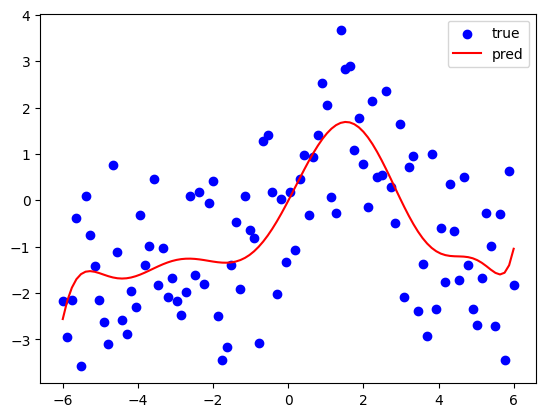

In [17]:
def get_features2(x):
    x = x.reshape((-1, 1))

    return np.concatenate([x, x**2, x**3, x**4, x ** 5, x**6, x**7, x**8,x **9, x ** 10], axis=1)

features = get_features2(x)

lr2 = LinearRegression().fit(features, y)
y_pred = lr2.predict(features)

plot(x, y, y_pred)
print(f'MSE: {mean_squared_error(y, y_pred)}')

In [18]:
10 ** 10 * 1e-6

10000.0

### Протестируем:

In [19]:
!wget https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/data/sem03-test-data.pkl
x_test, y_test = pickle.load(open('sem03-test-data.pkl', 'rb'))

def test(model, features):
    y_pred = lr.predict(features)
    plt.axvspan(-6, 6, alpha=0.1, color='green')
    plot(x_test, y_test, y_pred)
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')

--2026-02-03 19:42:46--  https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/data/sem03-test-data.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1785 (1.7K) [application/octet-stream]
Saving to: ‘sem03-test-data.pkl’

sem03-test-data.pkl 100%[===================>]   1.74K  --.-KB/s    in 0s      

2026-02-03 19:42:46 (23.3 MB/s) - ‘sem03-test-data.pkl’ saved [1785/1785]



In [20]:
# Либо так:
# Только тут файл имеет другое название.

#!wget https://raw.githubusercontent.com/SergeyKorpachev/math-faculty-ml/main/2026/seminars/seminar03/test-data.pkl

MSE: 6.9306483392482505


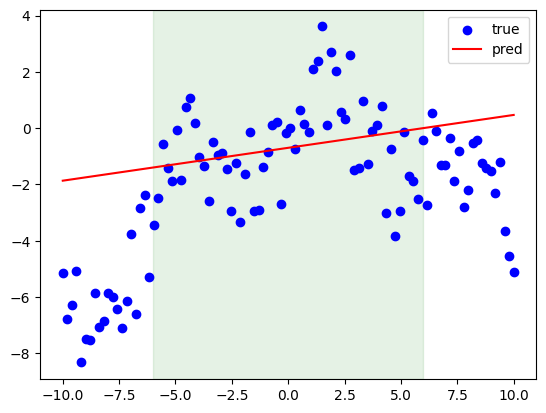

In [21]:
y_pred = lr.predict(x_test.reshape(-1, 1))

plt.axvspan(-6, 6, alpha=0.1, color='green')
plot(x_test, y_test, y_pred)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

In [22]:
lr.coef_

array([0.11682567])

MSE: 740836.796373581


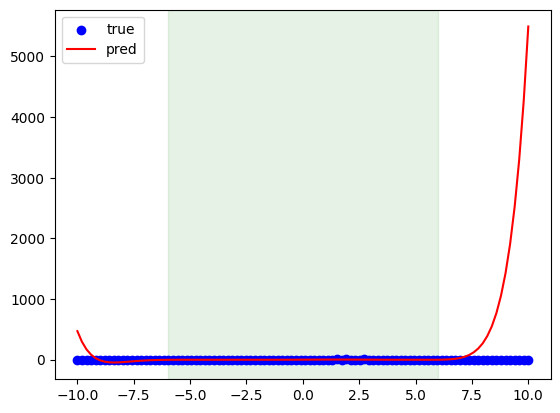

In [23]:
y_pred = lr2.predict(get_features2(x_test))

plt.axvspan(-6, 6, alpha=0.1, color='green')
plot(x_test, y_test, y_pred)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

In [24]:
lr2.coef_

array([ 1.55313249e+00,  1.88538134e-01, -2.83926146e-01, -5.51406171e-02,
        2.00380805e-02,  3.78480100e-03, -6.18841938e-04, -1.04251305e-04,
        6.96461496e-06,  1.01544183e-06])

### Придумаем что-нибудь умное

MSE: 1.927996465068679


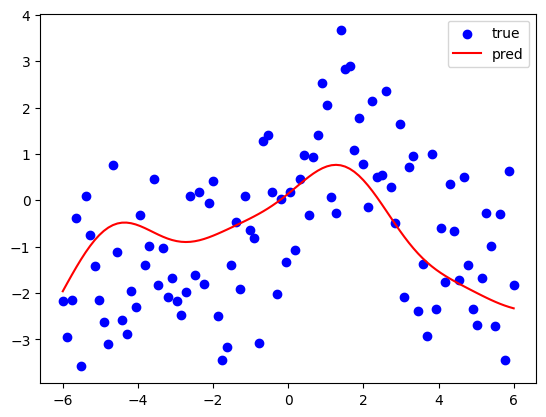

In [25]:
def features_smart(x):
    x = x.reshape((-1, 1))

    return np.concatenate([x** 2, np.sin(x), np.sin(x) ** 2, np.cos(x)], axis=1)

features = features_smart(x)

lr_smart = LinearRegression().fit(features, y)
y_pred = lr_smart.predict(features)

plot(x, y, y_pred)
print(f'MSE: {mean_squared_error(y, y_pred)}')

MSE: 3.106803846314961


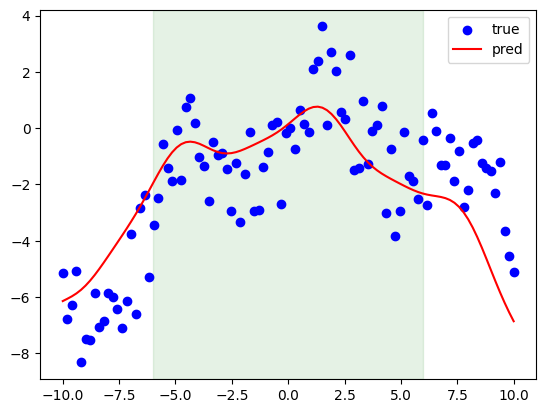

In [26]:
y_pred = lr_smart.predict(features_smart(x_test))

plt.axvspan(-6, 6, alpha=0.1, color='green')
plot(x_test, y_test, y_pred)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

## Ещё sklearn

In [27]:
from sklearn.datasets import fetch_openml

In [28]:
plasma_retinol = fetch_openml(data_id=511, as_frame=True)

In [29]:
# Изучите данные

print(plasma_retinol.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Determinants of Plasma Retinol and Beta-Carotene Levels

Summary:
Observational studies have suggested that low dietary intake or low plasma concentrations of retinol, beta-carotene, or other carotenoids might be associated with increased risk of developing certain types of cancer.  However, relatively few studies have investigated the determinants of plasma concentrations of these micronutrients. We designed a cross-sectional study to investigate the relationship between personal characteristics and dietary factors, and plasma concentrations of retinol, beta-carotene and other carotenoids. Study subjects (N = 315) were patients who had an elective surgical procedure during a three-year period to biopsy or remove a lesion of the lung, colon, breast, skin, ovary or uterus that was found to be non-cancerous. We display the data for only two of the analytes.
Plasma concentrations of the micronutrients varied widely f

In [30]:
from sklearn.model_selection import train_test_split

data = plasma_retinol.data
y = plasma_retinol.target

# Поделите данные на обучение и тест, возьмите test_size=0.3 и random_state=13
# Ваш код сюда :)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data, y, test_size=0.3, random_state=13)

In [31]:
y

,RETPLASMA
0,915
1,727
2,721
3,615
4,799
...,...
310,216
311,328
312,502
313,684


In [32]:
data.sample(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA
265,24,Female,Never,31.99715,No,3021.9,171.0,11.4,0.1,466.3,953,1176,67
84,37,Female,Never,19.98613,Yes_fairly_often,839.0,29.2,4.7,6.4,66.5,330,394,142
139,46,Male,Former,23.67727,No,2706.7,104.9,16.8,22.0,416.0,4387,926,52


In [33]:
data['SMOKSTAT'].value_counts()

,count
SMOKSTAT,
Never,157
Former,115
Current_Smoker,43


In [34]:
data.dtypes

,0
AGE,int64
SEX,category
SMOKSTAT,category
QUETELET,float64
VITUSE,category
CALORIES,float64
FAT,float64
FIBER,float64
ALCOHOL,float64
CHOLESTEROL,float64


In [35]:
data.dtypes[(data.dtypes != 'category')]

,0
AGE,int64
QUETELET,float64
CALORIES,float64
FAT,float64
FIBER,float64
ALCOHOL,float64
CHOLESTEROL,float64
BETADIET,int64
RETDIET,int64
BETAPLASMA,int64


In [36]:
data.dtypes[(data.dtypes != 'category')].index

Index(['AGE', 'QUETELET', 'CALORIES', 'FAT', 'FIBER', 'ALCOHOL', 'CHOLESTEROL',
       'BETADIET', 'RETDIET', 'BETAPLASMA'],
      dtype='object')

In [37]:
data.shape

(315, 13)

In [38]:
X_cat = data[data.dtypes[(data.dtypes == 'category')].index]
X_cat.sample(4)

,SEX,SMOKSTAT,VITUSE
26,Female,Former,Yes_not_often
269,Female,Former,Yes_fairly_often
198,Female,Former,Yes_not_often
106,Female,Former,Yes_not_often


In [39]:
X_num = data[data.dtypes[(data.dtypes != 'category')].index]
X_num.sample(4)

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA
27,61,25.18267,2837.3,84.2,33.8,0.0,192.1,2413,656,786
241,74,23.34593,1512.1,73.8,8.7,5.7,182.8,1167,1169,324
217,42,20.76896,1051.2,44.0,10.9,0.2,165.5,516,730,153
233,59,24.80399,2192.3,78.7,14.2,0.0,173.5,2579,1026,165


In [40]:
X_num.describe()

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,50.146032,26.157374,1796.654603,77.033333,12.788571,3.279365,242.460635,2185.603175,832.714286,189.892063
std,14.575226,6.013550,680.347435,33.829443,5.330192,12.322880,131.991614,1473.886547,589.289030,183.000803
min,19.000000,16.331140,445.200000,14.400000,3.100000,0.000000,37.700000,214.000000,30.000000,0.000000
25%,39.000000,21.799715,1338.000000,53.950000,9.150000,0.000000,155.000000,1116.000000,480.000000,90.000000
50%,48.000000,24.735250,1666.800000,72.900000,12.100000,0.300000,206.300000,1802.000000,707.000000,140.000000
75%,62.500000,28.853415,2100.450000,95.250000,15.600000,3.200000,308.850000,2836.000000,1037.000000,230.000000
max,83.000000,50.403330,6662.200000,235.900000,36.800000,203.000000,900.700000,9642.000000,6901.000000,1415.000000


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_test_split([0,1,2,3,4,5], [0,1,2,3,4,5])

[[0, 4, 5, 1], [2, 3], [0, 4, 5, 1], [2, 3]]

In [43]:
from sklearn.model_selection import train_test_split
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.3, random_state=13)

In [44]:
for x in [X_train_num, X_test_num, y_train, y_test]:
  print(x.shape)

(220, 10)
(95, 10)
(220,)
(95,)


In [45]:
lr = LinearRegression().fit(X_train_num, y_train)

y_pred = lr.predict(X_test_num)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 89614.52168358224


In [46]:
y_pred_train = lr.predict(X_train_num)
print(f'MSE: {mean_squared_error(y_train, y_pred_train)}')

MSE: 36318.682787227866


In [47]:
y_const = y_train.mean() + np.zeros(len(y_train))
print(f'MSE: {mean_squared_error(y_train, y_const)}')

MSE: 41575.65907024793


In [48]:
y_const = y_train.mean() + np.zeros(len(y_test))
print(f'MSE: {mean_squared_error(y_test, y_const)}')

MSE: 47952.6203077425


In [49]:
from sklearn.preprocessing import StandardScaler

# Сделайте масштабирование через StandardScaler
# Ваш код сюда :)
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [50]:
X_train_num_scaled

array([[-0.18148364,  0.75465624,  1.789288  , ...,  0.14866008,
         0.89854729, -0.17660096],
       [-0.31659837, -0.74202959, -0.34776521, ...,  0.81832506,
        -0.4845086 ,  0.10513696],
       [ 0.22386053, -0.03477849, -0.09807625, ..., -0.71567495,
        -0.32010374,  0.45316616],
       ...,
       [ 0.76431944, -0.00831207, -0.05543855, ..., -0.06547698,
        -1.17295395,  0.23771951],
       [-1.19484409,  0.11926416,  2.70002282, ...,  0.2167946 ,
         1.35066066, -0.64616416],
       [ 1.3723357 , -0.25826923,  0.10509885, ...,  0.49257717,
        -0.37764544, -0.59092143]])

In [51]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, lr)

# Обучите pipeline
# Ваш код сюда :)
pipeline.fit(X_train_num, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [52]:
y_pred = pipeline.predict(X_train_num)
print(f'MSE: {mean_squared_error(y_train, y_pred)}')

MSE: 36318.68278722786


In [53]:
y_pred = pipeline.predict(X_test_num)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 89614.52168358245


In [54]:
X_cat = data[data.dtypes[(data.dtypes == 'category')].index]
X_cat.sample(4)

,SEX,SMOKSTAT,VITUSE
264,Female,Former,Yes_not_often
157,Female,Never,Yes_fairly_often
279,Female,Current_Smoker,No
165,Female,Never,Yes_fairly_often


In [55]:
X_train_cat, X_test_cat = train_test_split(X_cat, test_size=0.3, random_state=13)

In [56]:
from sklearn.preprocessing import OneHotEncoder

# Сделайте OneHotEncoder с параметром handle_unknown = "ignore"
# Ваш код сюда :)
encoder = OneHotEncoder(handle_unknown = "ignore")
X_train_cat_scaled = encoder.fit_transform(X_train_cat)
X_test_cat_scaled = encoder.transform(X_test_cat)

In [57]:
X_train_cat_scaled.shape

(220, 8)

In [58]:
from sklearn.compose import make_column_transformer, make_column_selector

transformer = make_column_transformer(
    (scaler, make_column_selector(dtype_include=float)),
    (encoder, make_column_selector(dtype_exclude=float))
)

# Обучите transformer
# Ваш код сюда :)
transformer.fit_transform(X_train_1)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2860 stored elements and shape (220, 658)>

In [59]:
transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7839d5a907a0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7839d5a91f10>)])

In [60]:
pipeline = make_pipeline(transformer, lr)

# Обучите pipeline
# Ваш код сюда :)
pipeline.fit(X_train_1, y_train_1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7839d5a907a0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7839d5a91f10>)])),
                ('linearregression', LinearRegression())])

In [61]:
train_ix = X_train_1.index
#train_ix

data.loc[train_ix].equals(X_train_1)

True

In [62]:
test_ix = X_test_1.index
#test_ix

data.loc[test_ix].equals(X_test_1)

True

In [63]:
y_pred = pipeline.predict(X_train_1) # data.loc[train_ix]
print(f'MSE: {mean_squared_error(y_train, y_pred)}')

MSE: 1.77134863185898e-05


In [64]:
y_pred = pipeline.predict(X_test_1) # data.loc[test_ix]
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 95230.42096679404


In [65]:
pipeline[1].coef_

array([  12.83387438,   47.87390029,  -71.44757371,   -9.43662286,
         41.78761336,  -11.49356937,   35.02728977,   59.37313812,
        -13.34504837,  -23.46540963,  -69.763911  , -111.98969673,
         53.07072796,  -63.89825709,  -59.45240042,    4.93125812,
         75.57573953,  -66.3694885 ,    0.32741504,   -2.51890238,
        -11.52885654,  -70.07743247,  -93.11588156,  -25.73829675,
         34.64167418,  -41.89268378,  -15.62603465,   13.97583781,
         -5.43563812,    9.36655253,  -82.64347475,  -51.95865119,
        -57.11507652,  -86.32484706,  -44.88366182,   21.11648502,
         30.79737772,   -5.68117509,  150.68828132,   15.15401255,
        -26.24167856,  131.23092843,  -12.15164011,   72.35148012,
         20.81420204,  -32.88507731,   59.4752773 ,   -1.58974661,
         45.76645475,   13.61170585,   74.90520226,  119.82638238,
         75.99005564,  -29.47228639,   13.81093141,   85.5209783 ,
         43.39227905,  -83.50597021,   20.16850905,    8.32934

## Регуляризация

In [66]:
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

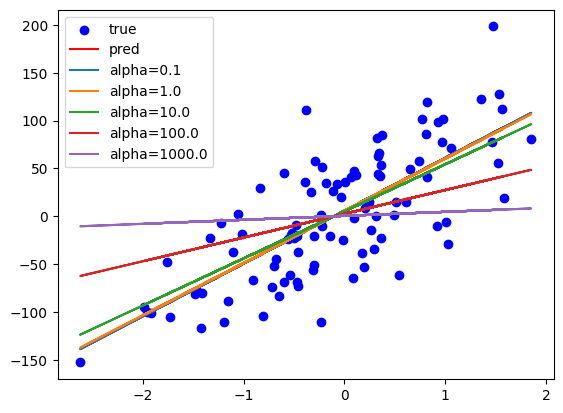

In [67]:
X, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
y_pred = lr.fit(X, y).predict(X)
plot(X, y, y_pred)
for alpha in np.logspace(-1, 3, 5, base=10):
    y_pred = Ridge(alpha=alpha).fit(X, y).predict(X)
    plt.plot(X, y_pred, label=f'alpha={alpha}')
plt.legend()

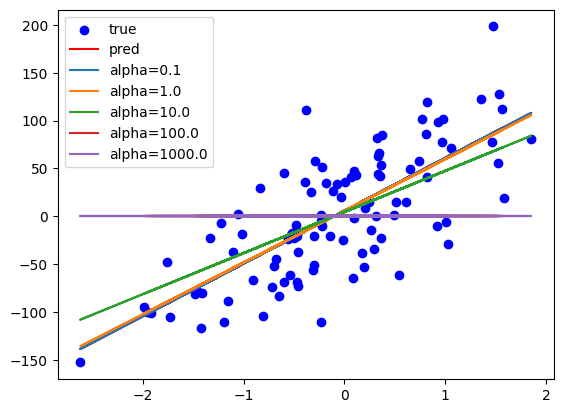

In [68]:
X, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
y_pred = lr.fit(X, y).predict(X)
plot(X, y, y_pred)
for alpha in np.logspace(-1, 3, 5, base=10):
    y_pred = Lasso(alpha=alpha).fit(X, y).predict(X)
    plt.plot(X, y_pred, label=f'alpha={alpha}')
plt.legend()

In [69]:
X, y = make_regression(n_samples=100, n_features=150, n_informative=10,
                       noise=.1, random_state=42, effective_rank=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [70]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 5.789874229872547


In [71]:
ridge = Ridge(alpha=.01).fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_ridge)}")

MSE: 4.895360477476199


In [72]:
lasso = Lasso(alpha=.01).fit(X_train, y_train)
y_lasso = lasso.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_lasso)}")

MSE: 1.7882510128864362


<BarContainer object of 150 artists>

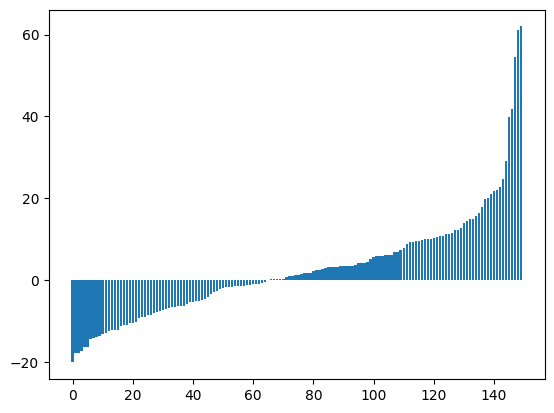

In [73]:
plt.bar(range(lr.coef_.shape[0]), sorted(lr.coef_))

<BarContainer object of 150 artists>

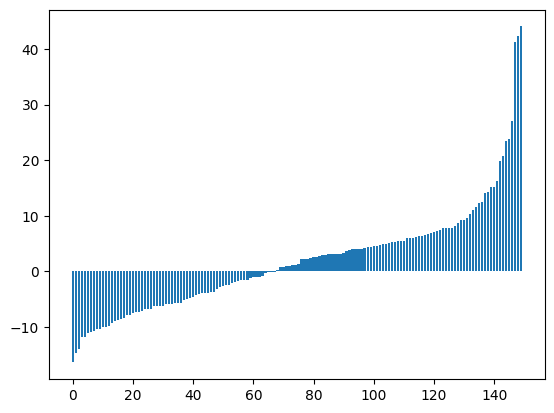

In [74]:
plt.bar(range(ridge.coef_.shape[0]), sorted(ridge.coef_))

<BarContainer object of 150 artists>

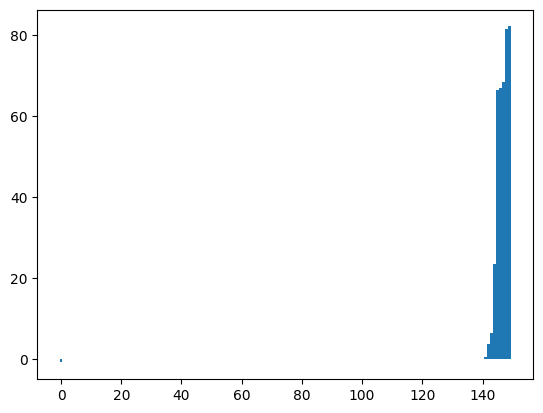

In [75]:
plt.bar(range(lasso.coef_.shape[0]), sorted(lasso.coef_))